<div style="background-color: lightblue; color:black; padding: 10px;">
     🎵 EmoVerse: Unified Music and Movie Recommendations Based on Your Facial Emotions 🎬
    
</div>



### 📌 Group No.: 51  

### 👥 Group Members:  
- **Hitesh Punjabi**  
- **Varsha Chhabria**  
- **Chiraag Chugh**  
- **Dhara Bhatia**  

### 🏆 Mentor: **Mrs. Priti Joshi**  

---

## **🚀 Introduction**
Welcome to **EmoVerse**, an system that recommends **music and movies** based on your facial emotions.  
💡 *Tired of not knowing what to watch or listen to? EmoVerse analyzes your emotions and suggests entertainment that matches your mood!*  

---

## **❓ Problem Statement**
📌 Choosing the right **song or movie** based on mood is often **difficult** and **time-consuming**.  
📌 **Emotions affect our entertainment choices**, but there’s no seamless way to personalize recommendations based on feelings.  

### 💡 **Solution: EmoVerse**
✔ **emotions from facial expressions**  
✔ **Maps detected emotions to a curated list of songs and movies**  
✔ **Provides instant, personalized entertainment recommendations**  



# Data Preparation

In [5]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# making folders
outer_names = ['test','train', 'val']
# original = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
inner_names = ['angry', 'happy', 'sad', 'calm']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

# to keep count of each category
angry = 0
happy = 0
sad = 0
calm = 0
angry_val = 0
happy_val = 0
sad_val = 0
calm_val = 0
angry_test = 0
happy_test = 0
sad_test = 0
calm_test = 0

df = pd.read_csv('./data/fer2013.csv')
mat = np.zeros((48,48),dtype=np.uint8)

In [6]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [14]:
# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()

    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 21005: #28709 full dataset
        if df['emotion'][i] == 0:
            img.save('./Data/train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('./Data/train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 2:
            img.save('./Data/train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 3:
            img.save('./Data/train/calm/im'+str(calm)+'.png')
            calm += 1
    # val
    elif i>21005 and i<23627:
      if df['emotion'][i] == 0:
        img.save('./Data/val/angry/im'+str(angry_val)+'.png')
        angry_val += 1
      elif df['emotion'][i] == 1:
        img.save('./Data/val/happy/im'+str(happy_val)+'.png')
        happy_val += 1
      elif df['emotion'][i] == 2:
        img.save('./Data/val/sad/im'+str(sad_val)+'.png')
        sad_val += 1
      elif df['emotion'][i] == 3:
        img.save('./Data/val/calm/im'+str(calm_val)+'.png')
        calm_val += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('./Data/test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save('./Data/test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 2:
            img.save('./Data/test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 3:
            img.save('./Data/test/calm/im'+str(calm_test)+'.png')
            calm_test += 1

print("Done!")

100%|██████████| 35887/35887 [01:07<00:00, 528.03it/s]

Done!


# EDA

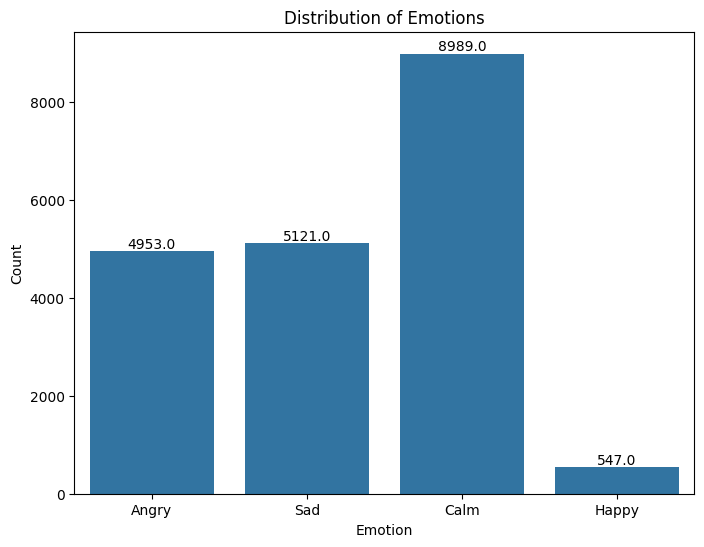

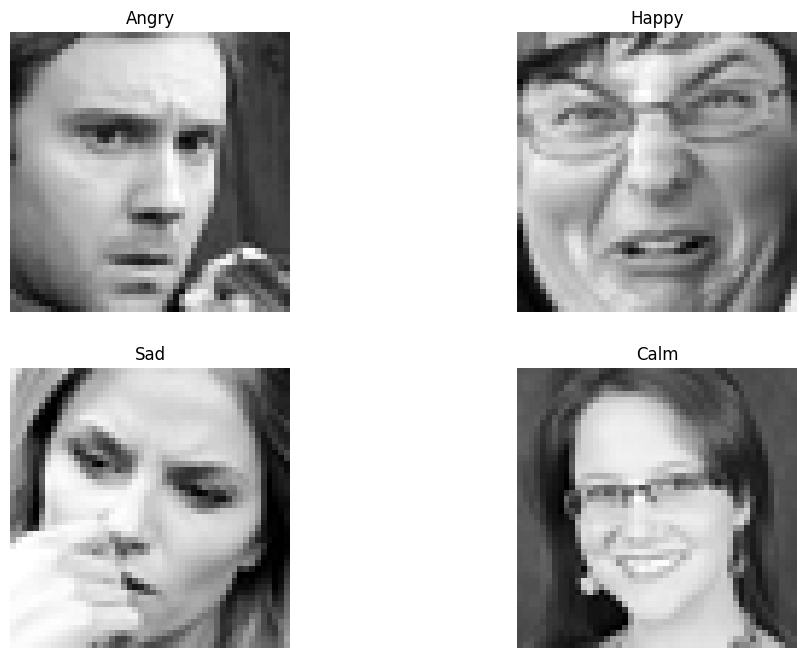

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping numeric labels to emotion labels
emotion_mapping = {0: 'Angry', 1: 'Happy', 2: 'Sad', 3: 'Calm'}
df['emotion_label'] = df['emotion'].map(emotion_mapping)

# Distribution of Emotions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='emotion_label', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Sample Images for each Emotion
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sample_image = df[df['emotion'] == i]['pixels'].iloc[0].split()
    sample_image = np.array(sample_image, dtype=np.uint8).reshape((48, 48))
    plt.imshow(sample_image, cmap='gray')
    plt.title(emotion_mapping[i])
    plt.axis('off')
plt.show()

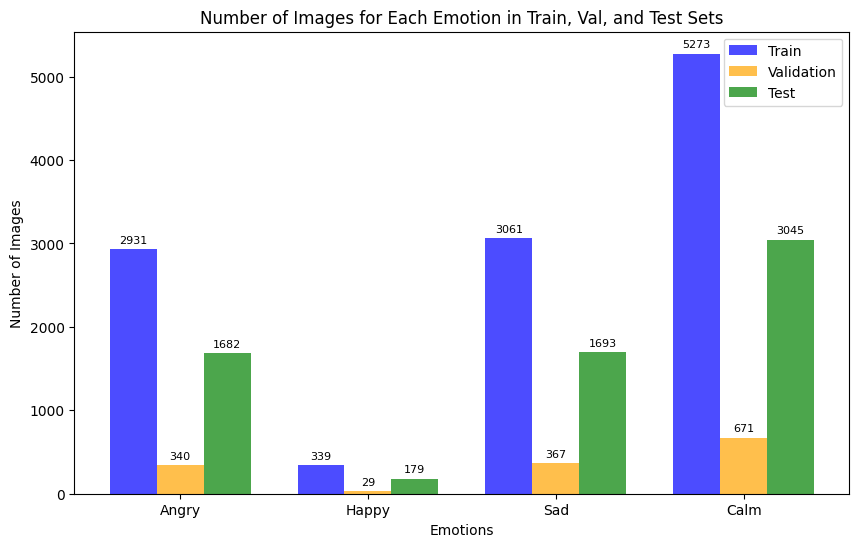

In [ ]:
import matplotlib.pyplot as plt

# Count the number of images for each emotion in train, val, and test sets
train_counts = [angry, happy, sad, calm]
val_counts = [angry_val, happy_val, sad_val, calm_val]
test_counts = [angry_test, happy_test, sad_test, calm_test]

emotions = ['Angry', 'Happy', 'Sad', 'Calm']

# Plotting the bar graph
bar_width = 0.25
index = range(len(emotions))

plt.figure(figsize=(10, 6))
bars_train = plt.bar(index, train_counts, width=bar_width, label='Train', color='blue', alpha=0.7)
bars_val = plt.bar([i + bar_width for i in index], val_counts, width=bar_width, label='Validation', color='orange', alpha=0.7)
bars_test = plt.bar([i + 2 * bar_width for i in index], test_counts, width=bar_width, label='Test', color='green', alpha=0.7)

plt.xlabel('Emotions')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Emotion in Train, Val, and Test Sets')
plt.xticks([i + bar_width for i in index], emotions)
plt.legend()

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=8)

add_labels(bars_train)
add_labels(bars_val)
add_labels(bars_test)

plt.show()

# Model Training

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# # command line argument
# ap = argparse.ArgumentParser()
# ap.add_argument("--mode",help="train/display")
# mode = ap.parse_args().mode

In [ ]:
# plots accuracy and loss curves
def plot_model_history(model_history):

    'Plot Accuracy and Loss curves with the model_history'

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [ ]:
# Define data generators
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), # Change 'lr' to 'learning_rate'
              metrics=['accuracy'])
model_info = model.fit( # Replace fit_generator with fit
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)

Found 11604 images belonging to 4 classes.
Found 1407 images belonging to 4 classes.
Found 6599 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/328 ━━━━━━━━━━━━━━━━━━━━ 2:08 879ms/step - accuracy: 0.4227 - loss: 1.1902

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


328/328 ━━━━━━━━━━━━━━━━━━━━ 172s 503ms/step - accuracy: 0.4334 - loss: 1.1823 - val_accuracy: 0.4776 - val_loss: 1.1356
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 170s 517ms/step - accuracy: 0.4630 - loss: 1.1478 - val_accuracy: 0.5672 - val_loss: 1.0019
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 196s 500ms/step - accuracy: 0.5785 - loss: 0.9783 - val_accuracy: 0.6766 - val_loss: 0.8097
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 208s 518ms/step - accuracy: 0.6415 - loss: 0.8380 - val_accuracy: 0.6880 - val_loss: 0.7354
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 195s 497ms/step - accuracy: 0.6757 - loss: 0.7670 - val_accuracy: 0.6901 - val_loss: 0.7175
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 171s 520ms/step - accuracy: 0.7043 - loss: 0.7018 - val_accuracy: 0.7306 - val_loss: 0.6553
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 195s 500ms/step - accuracy: 0.7169 - loss: 0.6662 - val_accuracy: 0.7285 - val_loss: 0.6561
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 207s 515ms/step - accuracy: 0.7327 - loss: 0.64

In [ ]:
# Evaluate the model on the test dataset
eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

<ipython-input-21-545f0cdef440>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))


Test Loss: 0.9173063635826111
Test Accuracy: 0.6947124600410461


In [ ]:
model.save_weights('model_weights_training.h5')
model.save('model_new_training.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


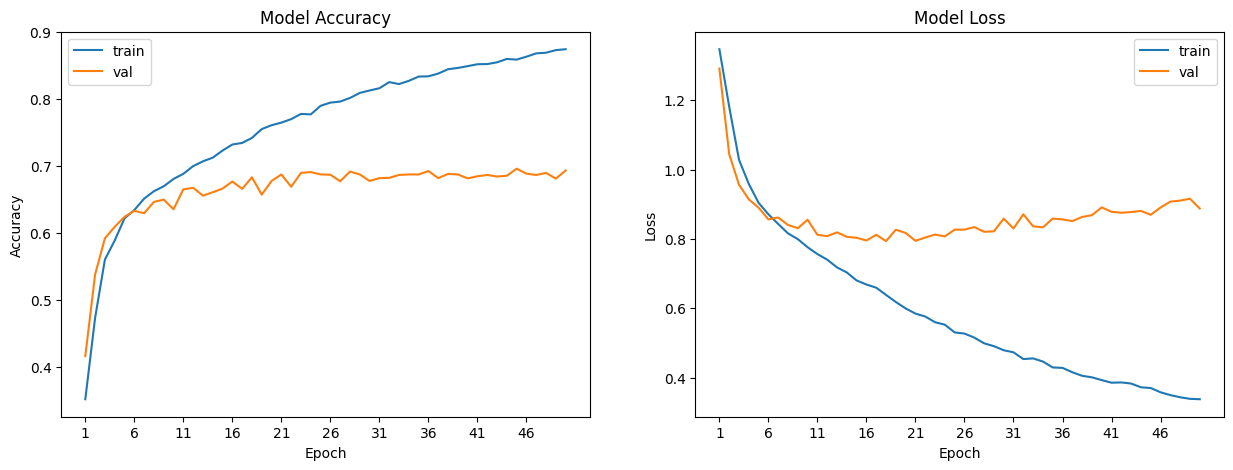

In [ ]:
plot_model_history(model_info)

In [ ]:
model_history_df = pd.DataFrame(model_info.history)
model_history_df

,loss,accuracy,val_loss,val_accuracy
0,1.347575,0.351750,1.291634,0.416016
1,1.181941,0.473139,1.044803,0.537891
2,1.028731,0.560050,0.956741,0.591797
3,0.958862,0.588606,0.914436,0.608984
4,0.904301,0.621556,0.890265,0.623828
5,0.871312,0.633972,0.856625,0.632812
6,0.843385,0.650972,0.861902,0.629297
7,0.816157,0.662098,0.840568,0.646094
8,0.799603,0.669405,0.831118,0.649609
9,0.776228,0.680436,0.855562,0.635156


In [ ]:
# model_history_df.to_csv('model_history.csv')

In [ ]:
index_where_equal = (model_history_df['loss'] - model_history_df['val_loss']).abs().idxmin()
index_where_min = model_history_df['val_loss'].idxmin()
index_where_equal, index_where_min

(4, 17)

Least Validataion Loss is observed after 17 epochs, hence we retrain the model for 18 epochs.

In [ ]:
# Define data generators
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 18

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)

Found 21005 images belonging to 4 classes.
Found 2621 images belonging to 4 classes.
Found 2591 images belonging to 4 classes.


Epoch 1/18


<ipython-input-28-5d7cbbf6abc8>:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


328/328 [==============================] - 15s 41ms/step - loss: 1.3412 - accuracy: 0.3600 - val_loss: 1.1997 - val_accuracy: 0.4844
Epoch 2/18
328/328 [==============================] - 13s 40ms/step - loss: 1.1018 - accuracy: 0.5122 - val_loss: 0.9909 - val_accuracy: 0.5699
Epoch 3/18
328/328 [==============================] - 14s 42ms/step - loss: 0.9853 - accuracy: 0.5760 - val_loss: 0.9533 - val_accuracy: 0.6004
Epoch 4/18
328/328 [==============================] - 13s 39ms/step - loss: 0.9262 - accuracy: 0.6081 - val_loss: 0.9016 - val_accuracy: 0.6187
Epoch 5/18
328/328 [==============================] - 13s 41ms/step - loss: 0.8868 - accuracy: 0.6271 - val_loss: 0.8869 - val_accuracy: 0.6027
Epoch 6/18
328/328 [==============================] - 12s 36ms/step - loss: 0.8501 - accuracy: 0.6433 - val_loss: 0.8511 - val_accuracy: 0.6367
Epoch 7/18
328/328 [==============================] - 13s 39ms/step - loss: 0.8149 - accuracy: 0.6620 - val_loss: 0.8571 - val_accuracy: 0.6465
Epo

In [ ]:
# Evaluate the model on the test dataset
eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

<ipython-input-29-545f0cdef440>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))


Test Loss: 0.7598645091056824
Test Accuracy: 0.702817440032959


In [ ]:
model.save_weights('model_weights_training_optimal.h5')
model.save('model_new_training_optimal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


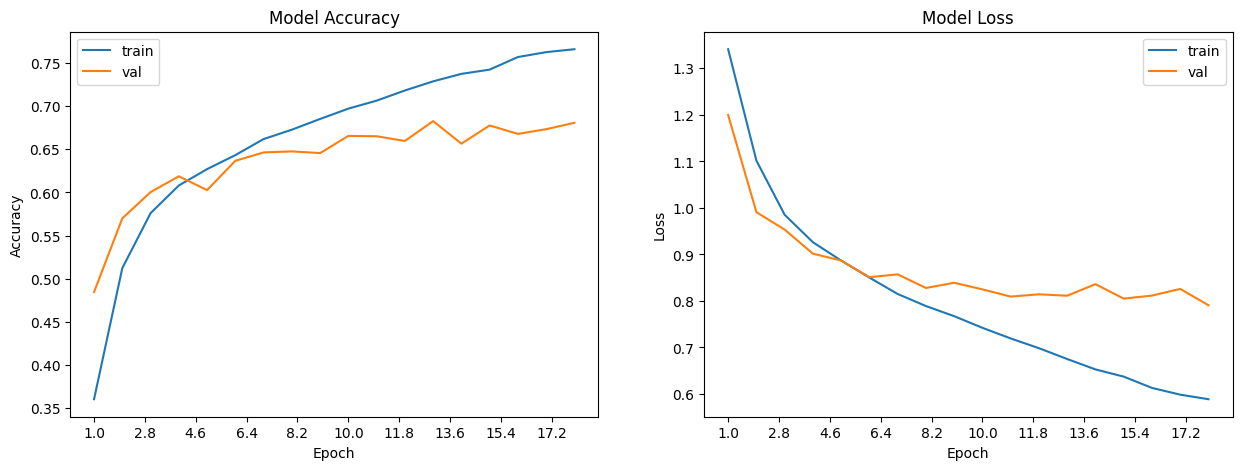

In [ ]:
plot_model_history(model_info)

### Confusion Matrix

<ipython-input-32-5f62ecd2a177>:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator).argmax(axis=1)


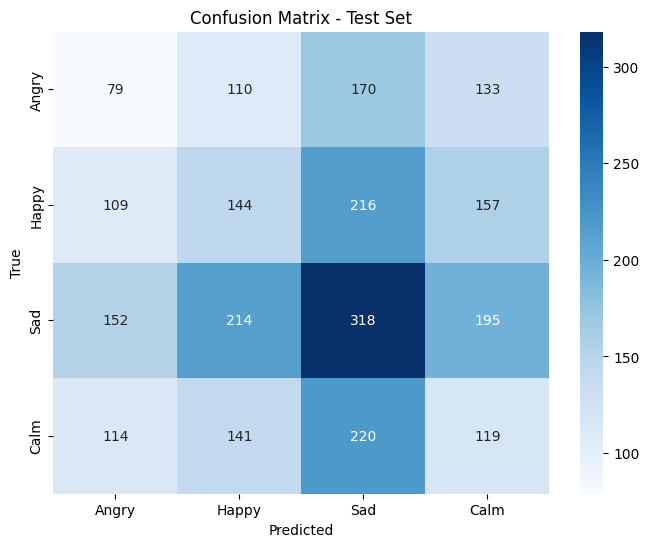


Classification Report:
               precision    recall  f1-score   support

       Angry       0.17      0.16      0.17       492
       Happy       0.24      0.23      0.23       626
         Sad       0.34      0.36      0.35       879
        Calm       0.20      0.20      0.20       594

    accuracy                           0.25      2591
   macro avg       0.24      0.24      0.24      2591
weighted avg       0.25      0.25      0.25      2591



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ... (your existing code)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred = model.predict_generator(test_generator).argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=emotions))

# Emotion Prediction

# Real time mood detection



In [27]:
import cv2
import numpy as np
from keras.models import load_model
import time
import os

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Error loading Haar Cascade XML file! Check OpenCV installation.")

# Load the trained emotion detection model
model_path = './model/model_new_training.h5'
if not os.path.exists(model_path):
    raise IOError(f"Model file not found at {model_path}. Check path!")

classifier = load_model(model_path)

# Emotion Labels (Ensure this matches your model's outputs)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialize the video capture
cap = cv2.VideoCapture(0)

# Timer settings
duration = 5  # Detect emotions for 5 seconds
start_time = time.time()
active_time = 0  
predicted_moods = []  
mood_for_each_second = {}

frame_count = 0
process_every_n_frames = 10  # Process every 10th frame to optimize performance

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image")
            break

        frame_count += 1
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(faces) > 0:
            active_time = time.time() - start_time  # Update active time

            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

                face_gray = gray[y:y + h, x:x + w]
                face_resized = cv2.resize(face_gray, (48, 48))
                face_array = np.expand_dims(face_resized, axis=0)
                face_array = np.expand_dims(face_array, axis=-1)
                face_array = face_array.astype('float32') / 255.0

                # Process every Nth frame to reduce redundant predictions
                if frame_count % process_every_n_frames == 0:
                    prediction = classifier.predict(face_array)
                    max_index = np.argmax(prediction[0])

                    # Ensure valid predictions
                    predicted_mood = emotion_labels[max_index] if 0 <= max_index < len(emotion_labels) else "Neutral"
                    predicted_moods.append(predicted_mood)

                    cv2.putText(frame, predicted_mood, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Store mood for each second
            current_second = int(active_time)
            if current_second not in mood_for_each_second and predicted_moods:
                mood_for_each_second[current_second] = predicted_moods[-1]
                print(f"{current_second + 1} sec Mood: {predicted_moods[-1]}")

        # Show the output frame
        cv2.imshow('Face Detection and Emotion Recognition', frame)

        # Stop after `duration` seconds
        if active_time >= duration:
            print("Timer expired!")
            break

        # Exit on 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Exiting application...")
            break

except KeyboardInterrupt:
    print("\nKeyboard Interrupt detected! Closing camera...")

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("\nCamera closed successfully!")

# Calculate final mood
if predicted_moods:
    final_mood = max(set(predicted_moods), key=predicted_moods.count)
    accuracy = predicted_moods.count(final_mood) / len(predicted_moods) * 100
else:
    final_mood = "No mood detected"
    accuracy = 0.0

print("\nMood detected for each second:")
for sec, mood in mood_for_each_second.items():
    print(f"{sec + 1} sec: {mood}")

print("\n")
print(f"Final Mood: {final_mood}")
print(f"Mood Accuracy: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1 sec Mood: Neutral
2 sec Mood: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3 sec Mood: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4 sec Mood: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
5 sec Mood: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6 sec Mood: Neutral
Timer expired!

Camera closed successfully!

Mood detected for each second:
1 sec: Neutral
2 sec: Neutral
3 sec: Happy
4 sec: Happy
5 sec: Happy
6 sec: Neutral


Final Mood: Happy
Mood Accuracy: 62.50%


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import os

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the trained emotion detection model
model_path = './model/model_new_training.h5'
if not os.path.exists(model_path):
    raise IOError(f"Model file not found at {model_path}. Check path!")

classifier = load_model(model_path)

# Corrected emotion labels (Ensure this matches model training)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load an image from the 'test_images' folder
image_path = 'test_images/angry.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    raise IOError(f"Image not found at {image_path}. Check path!")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Extract face region
    face_gray = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face_gray, (48, 48))  # Resize to match model input
    face_array = np.expand_dims(face_resized, axis=0)
    face_array = np.expand_dims(face_array, axis=-1)
    face_array = face_array.astype('float32') / 255.0  # Normalize

    # Predict emotion
    prediction = classifier.predict(face_array)
    print(f"Raw Prediction: {prediction}")
    print(f"Model Output Shape: {prediction.shape}")

    # Get the predicted emotion
    if len(prediction[0]) == len(emotion_labels):  # Ensure no mismatch
        max_index = np.argmax(prediction[0])
        predicted_emotion = emotion_labels[max_index]
    else:
        predicted_emotion = "Neutral"

    # Display result
    cv2.putText(image, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the image
cv2.imshow('Emotion Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Raw Prediction: [[7.7117175e-01 1.3872834e-01 8.8597015e-02 6.2754443e-05 8.6174323e-06
  5.5467046e-04 8.7686011e-04]]
Model Output Shape: (1, 7)


# Recommendations

<div style="background-color: lightblue; color:black; padding: 10px;">
    
**Song Recommender**
    
</div>

In [1]:
#Basic
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#Clsutering and Recommendations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
df = pd.read_csv('data/genres_v2.csv')
df.head()

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\2247330132.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

<div style="background-color: lightgray; padding: 10px;">

**Data Cleaning**   

</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df[df['song_name'].isnull()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
18597,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,...,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,...,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,...,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,...,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,...,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [6]:
#dropping rows with no song names and no uri and then dropping duplicates as well

# Drop rows with no song names and no URI
df = df.dropna(subset=['song_name', 'uri'])

# Remove duplicate rows based on 'song_name' and 'uri'
df = df.drop_duplicates(subset=['song_name', 'uri'])

# Get the count of final rows
final_row_count = len(df)

print("Count of final rows:", final_row_count)

Count of final rows: 18352


<div style="background-color: lightgray; padding: 10px;">

**EDA**

</div>

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3384710183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')


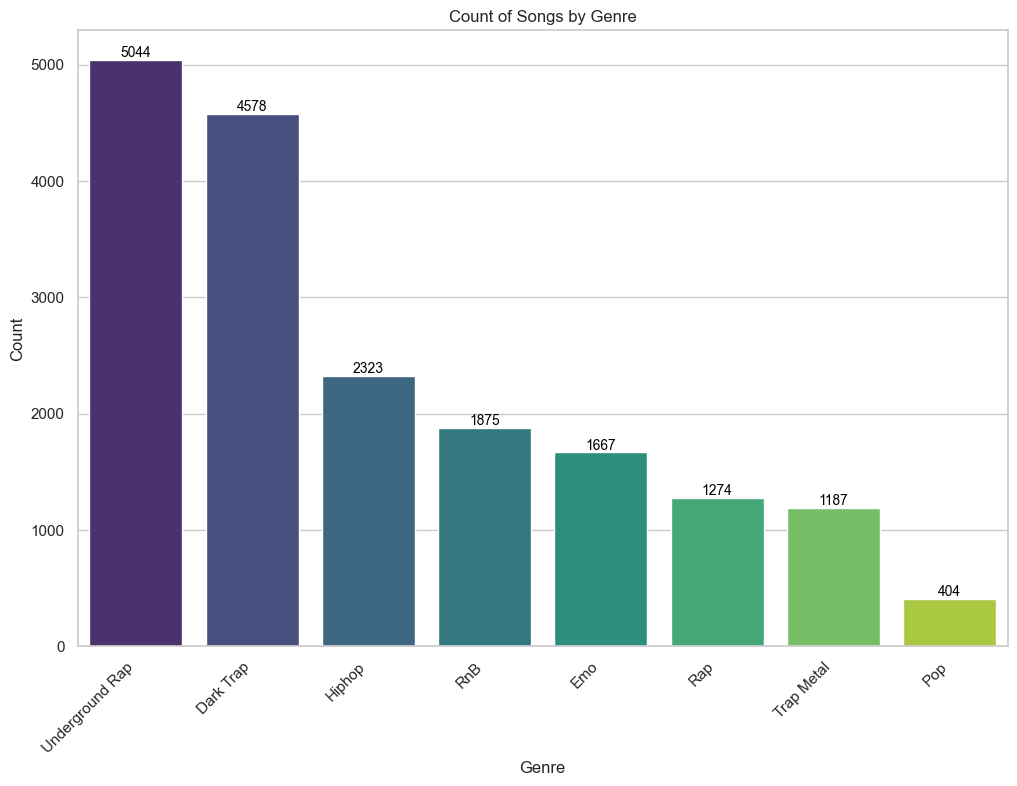

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a count plot with count labels using sns.countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()


In [8]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x='valence',
    y='energy',
    z='genre',
    color='genre',
    size_max=10,  # Set the maximum marker size
    opacity=0.7,  # Set marker opacity
    symbol='genre',  # Use different marker symbols for each genre
    width=800,
    height=600
)

# Customize layout
fig.update_layout(
    title='3D Scatter Plot of Valence, Energy, and Genre',
    scene=dict(
        zaxis=dict(showticklabels=False),
        xaxis_title='Valence',
        yaxis_title='Energy',
        zaxis_title='Genre',
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.9),  # Set the initial view angle
        )
    )
)

# Show the plot
fig.show()


In [9]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


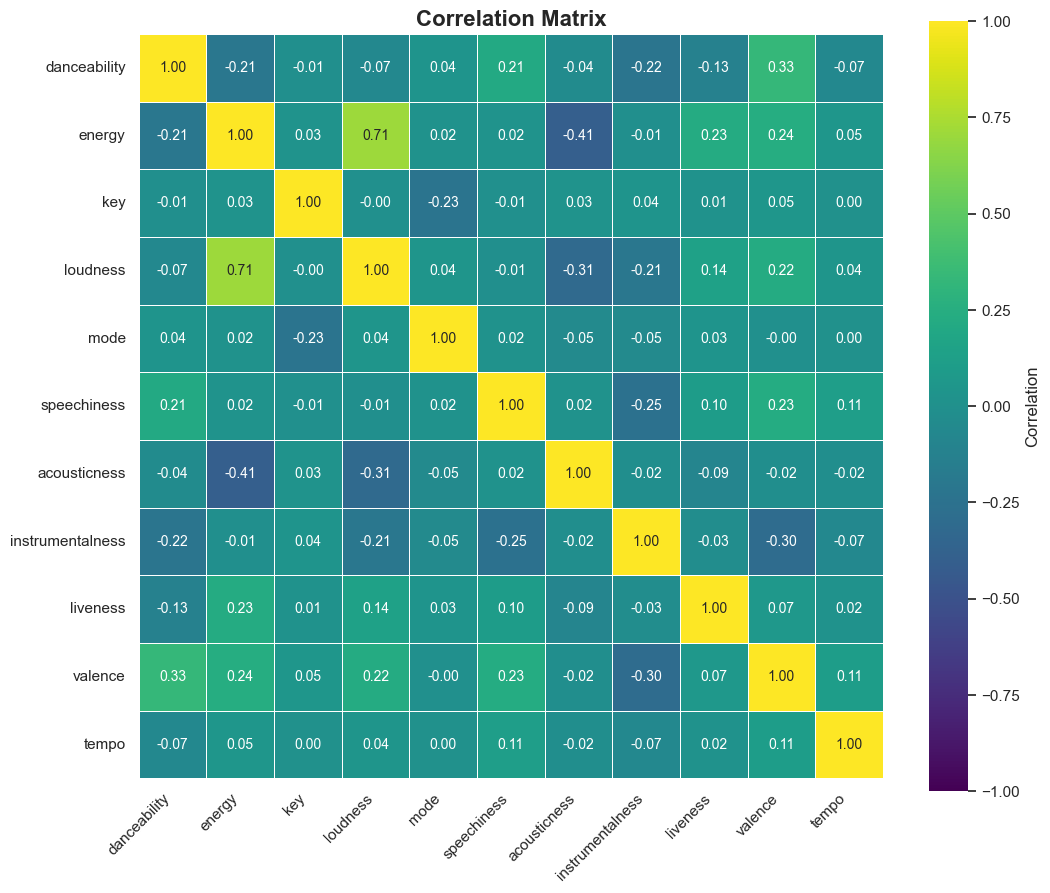

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Selecting only numeric columns from the DataFrame
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 10))

# Use the 'coolwarm' colormap with the same color palette
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)
plt.show()


In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18352 entries, 0 to 21523
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      18352 non-null  float64
 1   energy            18352 non-null  float64
 2   key               18352 non-null  int64  
 3   loudness          18352 non-null  float64
 4   mode              18352 non-null  int64  
 5   speechiness       18352 non-null  float64
 6   acousticness      18352 non-null  float64
 7   instrumentalness  18352 non-null  float64
 8   liveness          18352 non-null  float64
 9   valence           18352 non-null  float64
 10  tempo             18352 non-null  float64
 11  uri               18352 non-null  object 
 12  genre             18352 non-null  object 
 13  song_name         18352 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


# Song Recommendation


<div style="background-color: lightblue; color:black; padding: 10px;">

**Clustering According to mood**

</div>

In [12]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df


C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3586040230.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3364205444.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



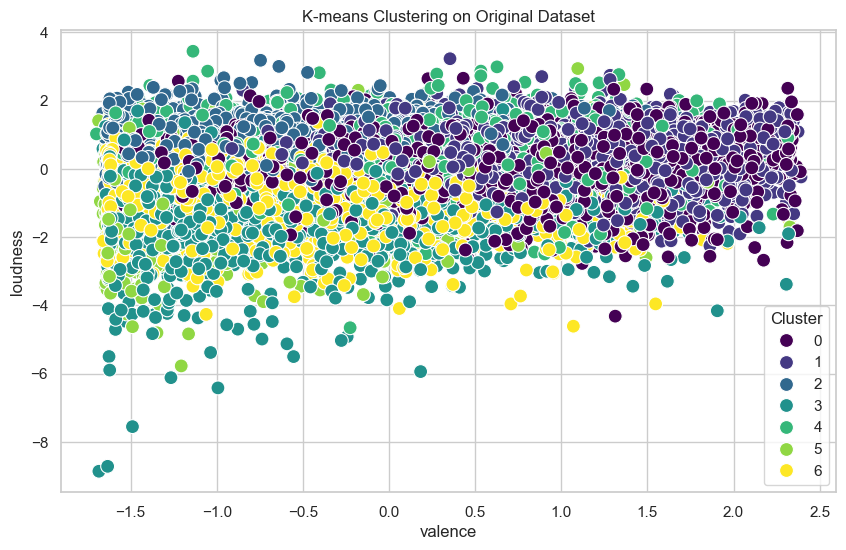

In [13]:
#  K-Means Clustering without PCA

X = filtered_df.drop(['uri','genre','song_name'], axis=1)  # Drop non-numeric columns if any

# Choose the number of clusters (you mentioned 5 clusters)
n_clusters = 7

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_no_pca = filtered_df
# Fit the KMeans model to your data
filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can use any relevant columns for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', data=filtered_df_no_pca, palette='viridis', s=100)
plt.title('K-means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()


<div style="background-color: lightgray; padding: 10px;">

**Clustering with PCA & Kmeans**

</div>

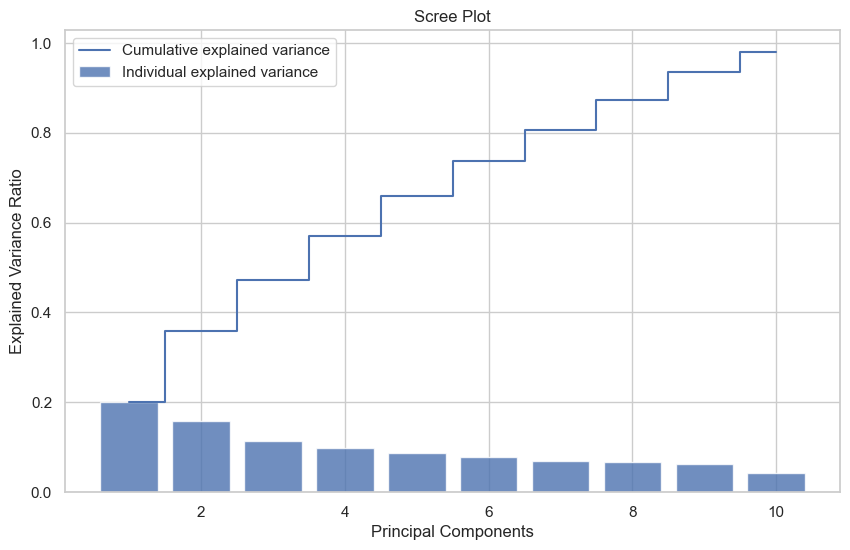

In [14]:
# Perform PCA
n_components = 10  # Set a higher value initially
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


In [15]:
# 4. Perform PCA
n_components = 7  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[ 0.74729341,  1.23863762, -1.23011329, ...,  0.48133153,
        -0.86787104, -0.54511903],
       [-1.5678939 , -0.0729223 , -0.32552114, ..., -0.73866248,
         1.00841379,  0.9426091 ],
       [ 1.44584131, -0.74249617, -0.74215366, ...,  1.04250706,
        -0.93221532,  0.70682481],
       ...,
       [-0.44862149,  0.23462046, -0.07725616, ...,  0.0746597 ,
         0.47137008,  0.59836508],
       [ 0.58530391,  1.08221556, -0.21588203, ...,  1.06271849,
        -0.87617207,  0.74892901],
       [ 1.18116072,  0.88273037,  0.73865583, ...,  1.29031016,
         0.41283436, -0.79115055]])

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3536022978.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



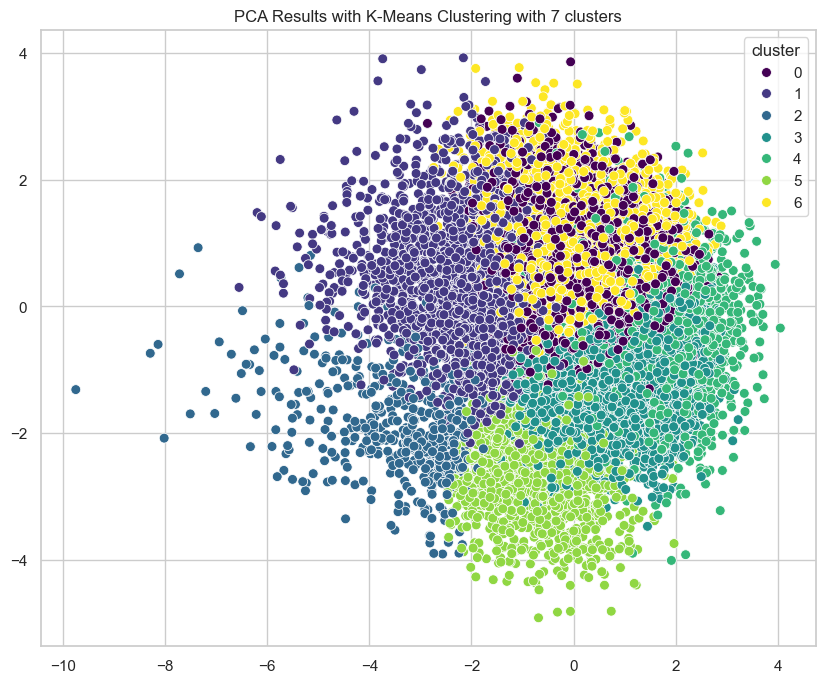

In [16]:
# 5. K-Means Clustering on PCA Results
n_clusters = 7 # Number of clusters (adjust as needed)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [17]:
filtered_df_pca

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,6
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",4
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,6
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,6
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,6


<div style="background-color: lightgray; padding: 10px;">

**EDA on clusters and assigning them moods**

</div>

In [18]:
filtered_df_pca['cluster'].value_counts()

cluster
6    4958
0    4309
3    3386
1    2327
4    1677
5    1164
2     531
Name: count, dtype: int64

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\782832588.py:18: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\782832588.py:18: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\782832588.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\782832588.py:18: UserWarning:

No artist

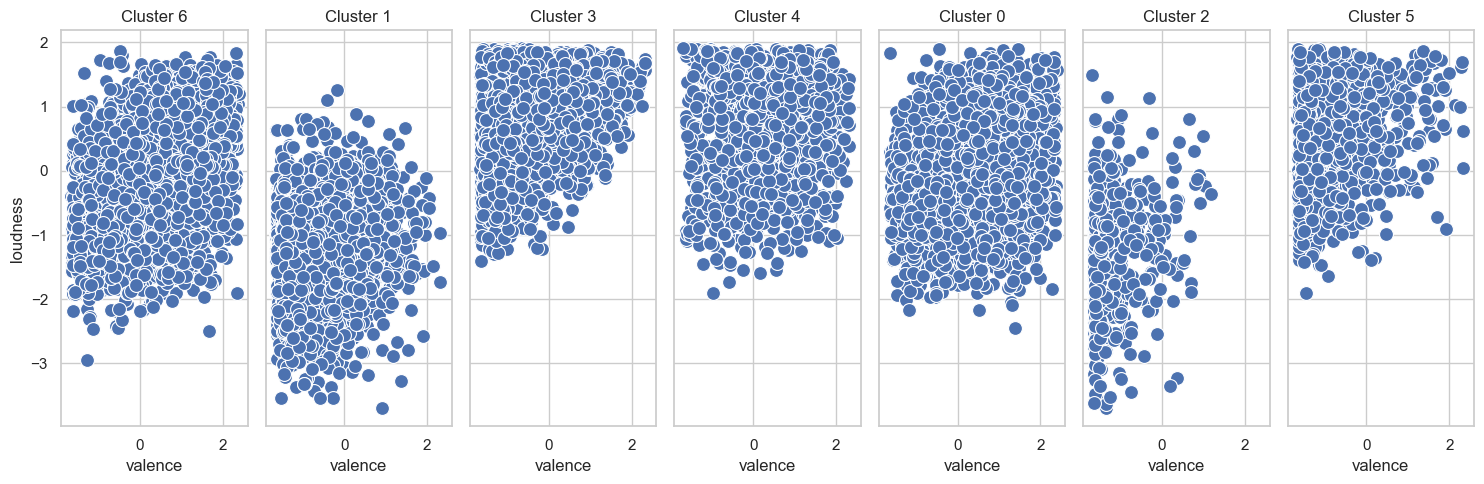

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = filtered_df_pca['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()


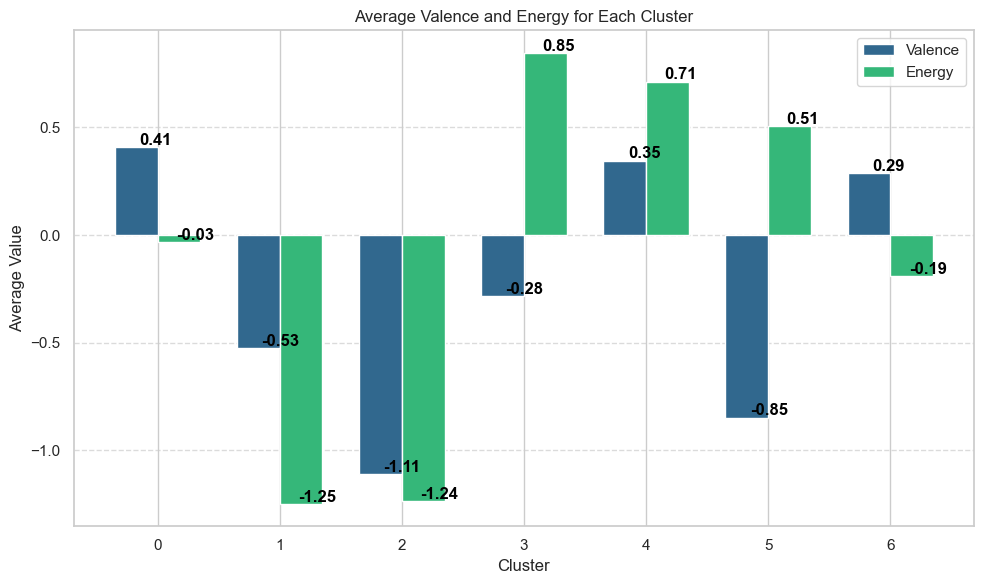

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = filtered_df_pca.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', 2)

# Plotting the average 'valence' and 'energy' for each cluster in grouped bars
bar_width = 0.35
index = cluster_means['cluster']

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, color=colors[0], label='Valence')
plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, color=colors[1], label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each Cluster')
plt.xticks(index, cluster_means['cluster'])
plt.legend()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [21]:
#Label each cluster with specific mood

filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Suprise', '')
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Disgust', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 2, 'Angry', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 3, 'Sad', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 4, 'Neutral', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 5, 'Fear', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 6, 'Happy', filtered_df_pca['mood'])

filtered_df_pca

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3658920253.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3658920253.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\3658920253.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,6,Happy
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1,Disgust
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3,Sad
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3,Sad
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,6,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",4,Neutral
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,6,Happy
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,6,Happy
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,6,Happy


<div style="background-color: lightgray; padding: 10px;">

**EDA on the moods**

</div>

<div style="background-color: lightgray; padding: 10px;">

**1. Number of songs assigned to each mood**

</div>

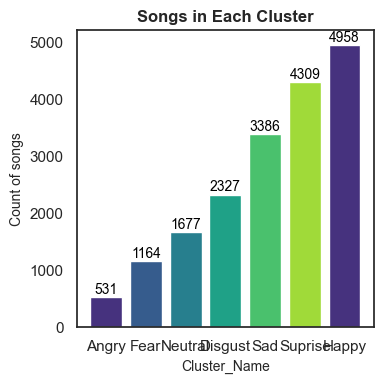

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style without gridlines
sns.set(style="white")

# Get value counts of each unique value in 'cluster' column
cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting a bar graph for the counts of each unique value in 'cluster' column
plt.figure(figsize=(4, 4))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.title('Songs in Each Cluster', fontsize=12, fontweight='bold')
plt.xlabel('Cluster_Name', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)

# Display count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()


<div style="background-color: lightgray; padding: 10px;">

**2. Count of songs of all genres in each mood**

</div>

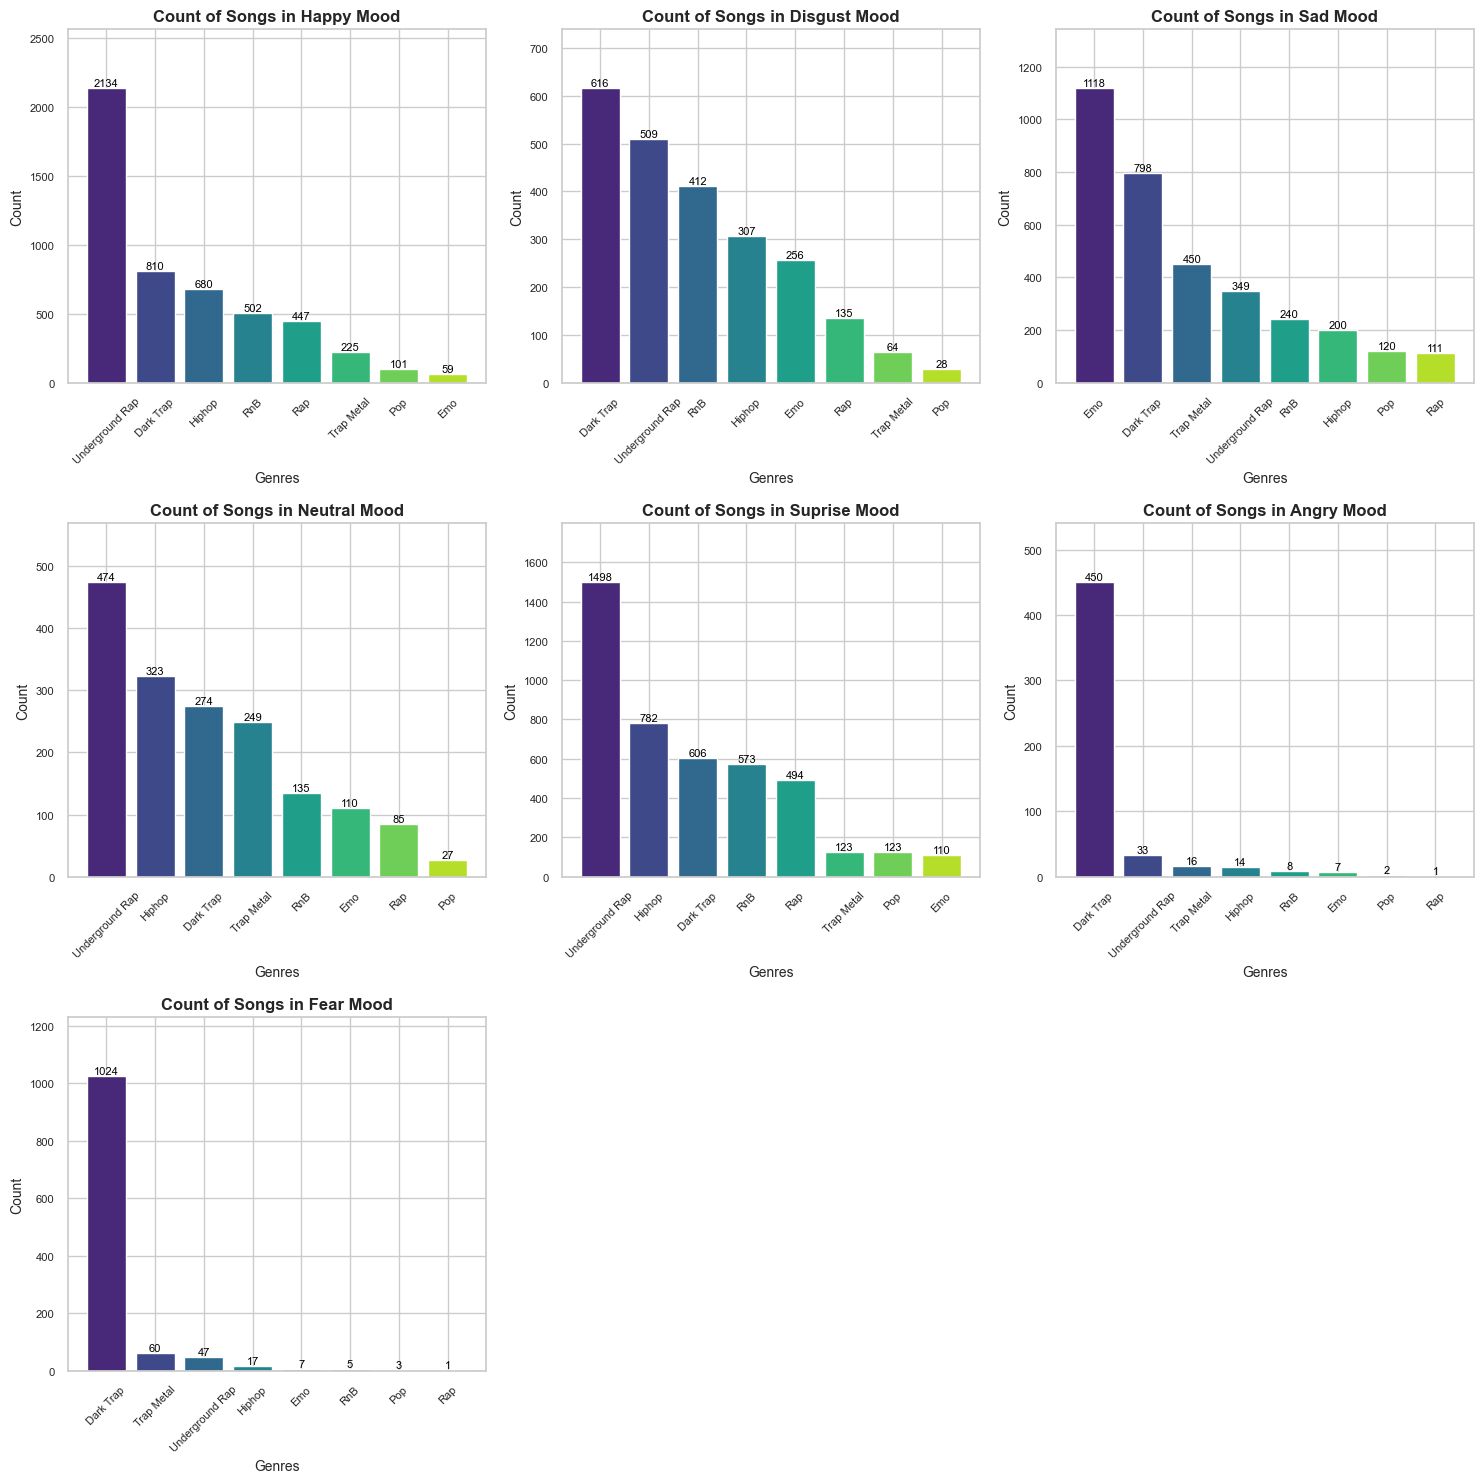

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set a Seaborn style
sns.set(style="whitegrid")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
num_moods = len(unique_moods)  # 7 moods

# Adjust subplot grid size
rows = math.ceil(num_moods / 3)  # Dynamic row calculation
cols = min(num_moods, 3)  # Max 3 columns

# Set the color palette for genres
colors = sns.color_palette('viridis', len(filtered_df_pca['genre'].unique()))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten in case of single row

for i, mood in enumerate(unique_moods):
    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    bars = axes[i].bar(genre_counts.index, genre_counts.values, color=colors)

    axes[i].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Genres', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].set_ylim(0, genre_counts.max() * 1.2)

    # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



# Spotify

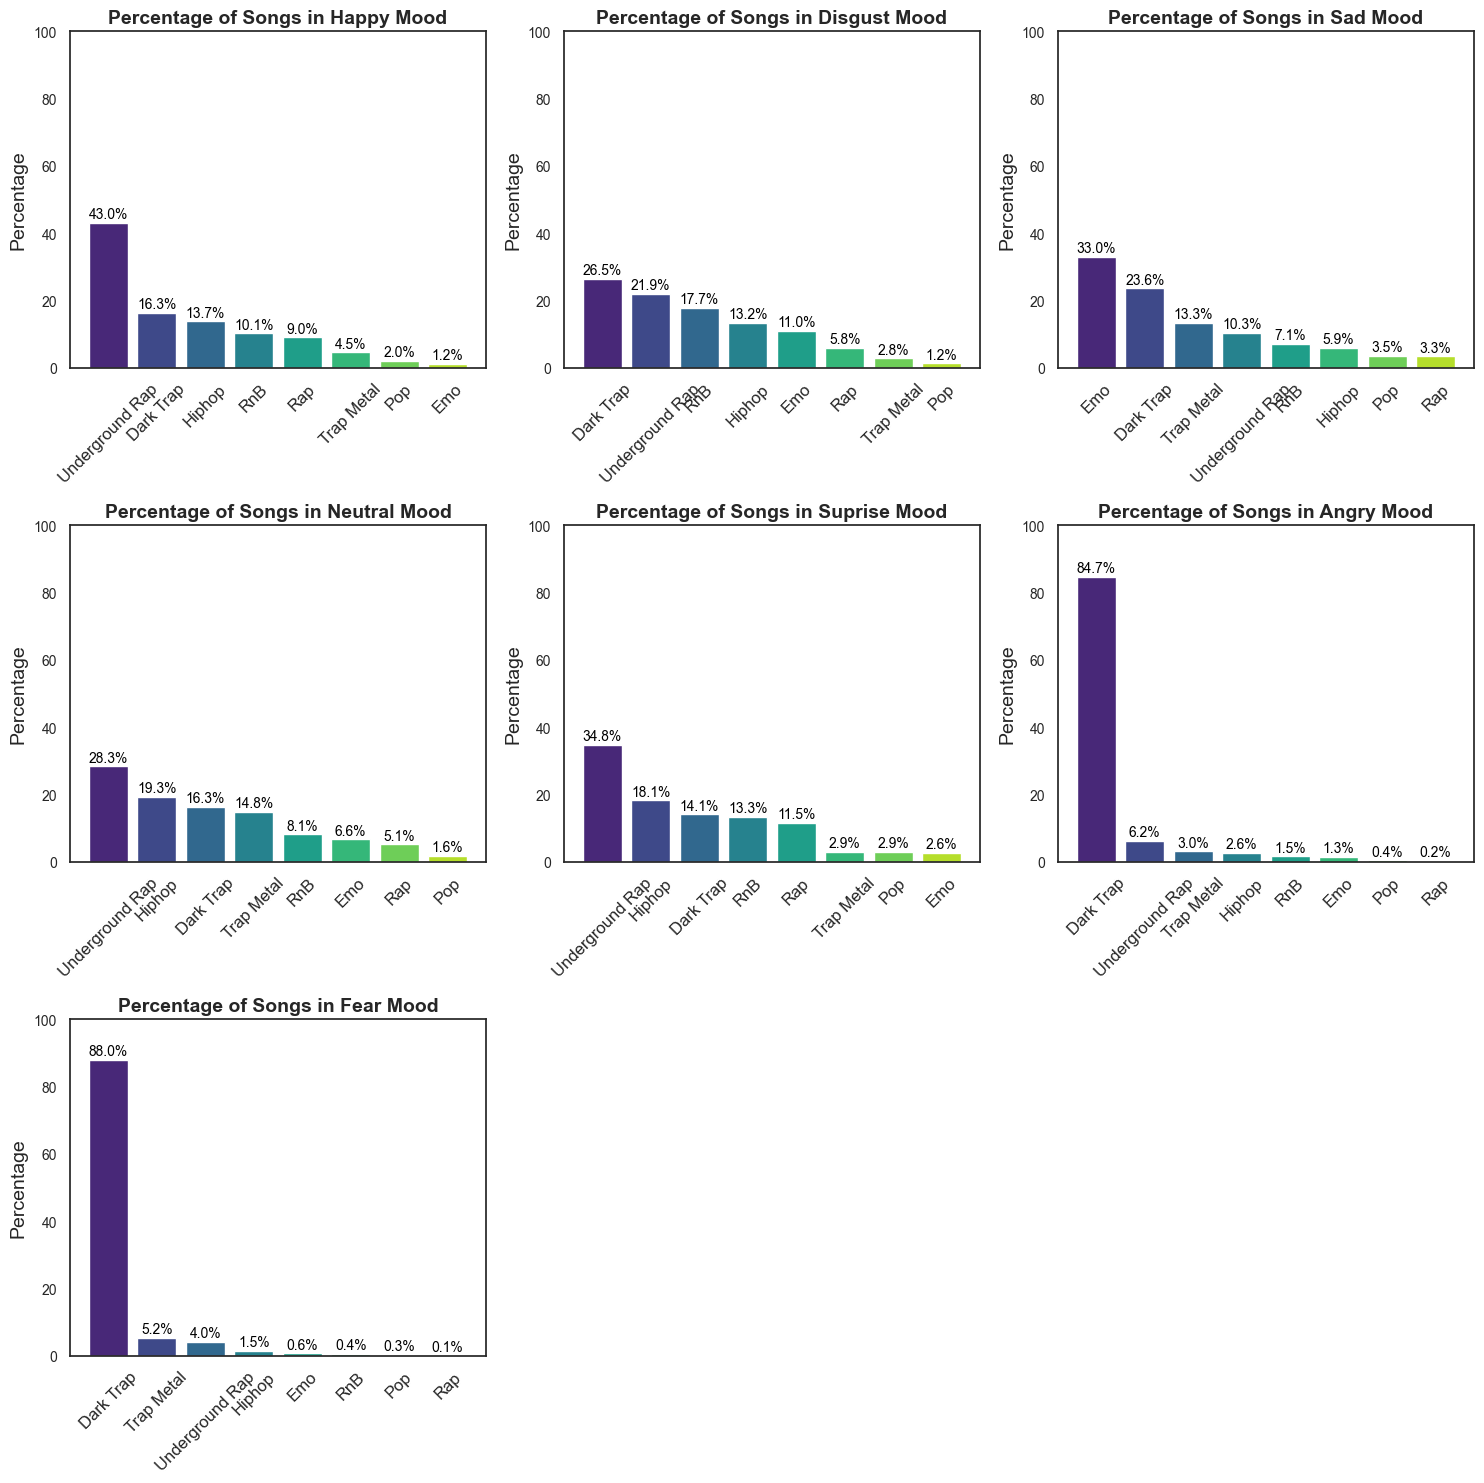

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set a Seaborn style
sns.set(style="white")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
num_moods = len(unique_moods)  # 7 moods

# Dynamically determine rows & columns
rows = math.ceil(num_moods / 3)  # Adjust rows based on moods
cols = min(num_moods, 3)  # Max 3 columns

# Set color palette
colors = sns.color_palette('viridis', len(filtered_df_pca['genre'].unique()))

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten for easier indexing

for i, mood in enumerate(unique_moods):
    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts(normalize=True) * 100  # Convert to percentage

    bars = axes[i].bar(genre_counts.index, genre_counts.values, color=colors)

    axes[i].set_title(f'Percentage of Songs in {mood} Mood', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Percentage', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].set_ylim(0, 100)

    # Display percentages above bars
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



# Recommending a song on the basis of user choice and mood using content based filtering technique**


In [29]:
import numpy as np

# Detected mood
print(final_mood)# import emo_model
# final_mood = emo_model.record_video(5) #input the number of seconds for which the video has to be recorded

# Filter DataFrame based on detected mood
filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == final_mood]

# Select 5 random songs from the filtered DataFrame
random_songs = filtered_by_mood.sample(5)['song_name']

print("Detected mood is:", final_mood)
print("Random songs based on detected mood:")
print(random_songs)

Happy
Detected mood is: Happy
Random songs based on detected mood:
7658        Believe That
5369             On Fire
15037          Too Hotty
8216     Uber Everywhere
587           Need-a-Hit
Name: song_name, dtype: object


In [30]:
filtered_by_mood = filtered_by_mood.drop_duplicates(subset=['song_name'])

In [31]:
filtered_by_mood

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,6,Happy
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,6,Happy
5,0.341630,-0.511678,-1.400101,-1.421701,0.854028,1.692303,-0.584938,0.553743,-0.442084,-1.321199,-0.256586,spotify:track:6fsypiJHyWmeINsOLC1cos,Dark Trap,Gatteka,6,Happy
7,0.174979,0.290904,0.773751,0.524041,0.854028,0.323706,-0.610914,-0.360457,-0.548141,-0.579490,-0.493381,spotify:track:0LLeuNBWPOg3XA73yab3PT,Dark Trap,T.R.U. (Totally Rotten Underground),6,Happy
8,0.668759,0.515403,-1.128370,1.562670,0.854028,0.160609,-0.508426,-0.360457,-0.807981,-0.980184,2.331571,spotify:track:37gqBnUAZe8BY8WR56kDNk,Dark Trap,I Put My Dick in Your Mental,6,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,0.600864,-0.309629,-1.128370,0.213802,0.854028,0.224429,-0.386102,-0.360457,0.870374,1.321671,1.297619,spotify:track:2rlXwCyW8z6JL1fOEDoBXJ,Hiphop,I Still Luv Her (feat. Scoe & Don Dolla),6,Happy
21516,0.903304,-0.006556,0.230288,0.082624,0.854028,-0.130130,-0.769747,-0.360457,-0.402312,0.405192,1.366526,spotify:track:5zEoohLO20ofIBg0fzPqhQ,Hiphop,Get $ Paid,6,Happy
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,6,Happy
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,6,Happy


In [32]:
import ipywidgets as widgets
import random
from IPython.display import display

# Initialize top_recommendation_uri as a global variable
top_recommendation_uri = None

# Randomly select 5 songs from the filtered dataset
random_songs = random.sample(list(filtered_by_mood['song_name'].values), min(5, len(filtered_by_mood)))

# Create a dropdown widget with only 5 random songs
song_dropdown = widgets.Dropdown(
    options=random_songs,
    description='Select a song:'
)

# Display the dropdown widget
display(song_dropdown)

# Function to handle song selection
def on_song_selection(change):
    global top_recommendation_uri, selected_song  

    selected_song = change.new  # Get the selected song
    print(f"You selected: {selected_song}")

    # Check if the selected song exists in the filtered dataset
    if selected_song in filtered_by_mood['song_name'].values:
        selected_song_features = filtered_by_mood.loc[
            filtered_by_mood['song_name'] == selected_song, 
            ['energy', 'valence']
        ].values.flatten()

        all_songs_features = filtered_by_mood[['energy', 'valence']].values
        similarities = cosine_similarity([selected_song_features], all_songs_features)

        # Create a dataframe with similarity scores
        result_df = pd.DataFrame({
            'song_name': filtered_by_mood['song_name'], 
            'similarity': similarities.flatten(), 
            'uri': filtered_by_mood['uri']
        })

        # Sort and get top recommendation (excluding selected song)
        result_df = result_df.sort_values(by='similarity', ascending=False).reset_index(drop=True)
        result_df = result_df[result_df['song_name'] != selected_song]

        if not result_df.empty:
            top_recommendation_uri = result_df.iloc[0]['uri']
            print(f"Top recommended song URI: {top_recommendation_uri}")
        else:
            print("No recommendations available.")

# Register the function to observe dropdown selection
song_dropdown.observe(on_song_selection, names='value')


Dropdown(description='Select a song:', options=('Road Rage (feat. Guap Tarantino)', 'Sobriety', 'Mario Cart', …

In [42]:
print(song_dropdown.value)
# 6bRWVymynuhmr8kcpA5SCo

Mario Cart


In [43]:
import json
import time
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import webbrowser


In [44]:
TOKEN_FILE = "spotify_token.json"

# Function to load stored credentials and tokens
def load_token():
    try:
        with open(TOKEN_FILE, "r") as file:
            return json.load(file)
    except (FileNotFoundError, json.JSONDecodeError):
        return {}

# Function to save updated credentials and tokens
def save_token(data):
    with open(TOKEN_FILE, "w") as file:
        json.dump(data, file, indent=4)


In [45]:
def authenticate_spotify():
    """Prompts for client_id and client_secret if missing, then authenticates with Spotify."""
    token_data = load_token()
    # If client_id and secret are missing, prompt the user
    if not token_data.get("client_id") or not token_data.get("client_secret"):
        token_data["client_id"] = input("Enter Spotify Client ID: ")
        token_data["client_secret"] = input("Enter Spotify Client Secret: ")
        token_data["redirect_uri"] = "http://127.0.0.1:8888/callback"
        save_token(token_data)

    auth_manager = SpotifyOAuth(
        client_id=token_data["client_id"],
        client_secret=token_data["client_secret"],
        redirect_uri=token_data["redirect_uri"],
        scope="user-modify-playback-state user-read-playback-state"
    )

    token_info = auth_manager.get_access_token(as_dict=True)
    token_info["expires_at"] = time.time() + token_info["expires_in"]  # Set expiry time
    save_token({**token_data, **token_info})  # Merge and save new token data
    return spotipy.Spotify(auth=token_info["access_token"])

In [46]:
def refresh_token():
    """Refreshes the Spotify token if expired."""
    token_data = load_token()
    
    # If no refresh token exists, re-authenticate
    if "refresh_token" not in token_data:
        print("⚠️ No refresh token found. Re-authenticating...")
        return authenticate_spotify()
    
    auth_manager = SpotifyOAuth(
        client_id=token_data["client_id"],
        client_secret=token_data["client_secret"],
        redirect_uri=token_data["redirect_uri"]
    )

    token_info = auth_manager.refresh_access_token(token_data["refresh_token"])
    token_info["expires_at"] = time.time() + token_info["expires_in"]  # Update expiry time
    save_token({**token_data, **token_info})  # Merge updated token data
    return spotipy.Spotify(auth=token_info["access_token"])


In [47]:
def get_spotify_client():
    """Ensures a valid token is available, refreshes if expired."""
    token_data = load_token()

    if "expires_at" not in token_data or time.time() > token_data["expires_at"]:
        print("🔄 Token expired. Refreshing token...")
        return refresh_token()

    return spotipy.Spotify(auth=token_data["access_token"])


In [48]:
def play_track_by_name(song_name):
    """Searches for a song by name and plays it on Spotify."""
    global sp
    sp = get_spotify_client()

    # Search for the track
    results = sp.search(q=song_name, limit=1, type='track')

    if results["tracks"]["items"]:
        track_uri = results["tracks"]["items"][0]["uri"]
        print(f"🔍 Found song: {song_name} (URI: {track_uri})")
        
        # Get available devices
        devices = sp.devices()
        device_id = None

        if devices["devices"]:
            device_id = devices["devices"][0]["id"]

        # Play the song
        if device_id:
            sp.start_playback(device_id=device_id, uris=[track_uri])
            print(f"🎵 Now playing: {song_name}")
        else:
            print("⚠️ No active device found.")
    else:
        print(f"❌ No results found for '{song_name}'.")


In [49]:
# Step 1: Authenticate and Get Spotify Client
sp = get_spotify_client()  # Ensures authentication

# Step 2: Play the Recommended Track
if top_recommendation_uri:
    play_track_by_name(song_dropdown.value)

else:
    print("⚠️ No recommended song available.")


🔍 Found song: Mario Cart (URI: spotify:track:0I7zMZnezjfndn6ZGZbwsa)
🎵 Now playing: Mario Cart


# Movie Recomendations

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("./Data/movie_dataset.csv")  # Replace with actual file path

# Display basic info
print(df.info())
print(df.head())  # Show first few rows

# Check for missing values
print(df.isnull().sum())

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46173 entries, 0 to 46172
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   46173 non-null  int64  
 1   Ratings      46173 non-null  float64
 2   Reviews      46173 non-null  object 
 3   movie_name   46173 non-null  object 
 4   Resenhas     46173 non-null  object 
 5   genres       46173 non-null  object 
 6   Description  46173 non-null  object 
 7   emotion      46173 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.8+ MB
None
   Unnamed: 0  Ratings                                            Reviews  \
0           0      3.0  It had some laughs, but overall the motivation...   
1           1      4.0  WAITING TO EXHALE Waiting, and waiting, and wa...   
2           2      4.0  Angela Basset was good as expected, but Whitne...   
3           3      5.0  The movie is okay, mediocre might even be the ...   
4           4      5

,Unnamed: 0,Ratings,Reviews,movie_name,Resenhas,genres,Description,emotion
0,0,3.0,"It had some laughs, but overall the motivation...",Waiting to Exhale,"Riu algumas risadas, mas no geral a motivação ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
1,1,4.0,"WAITING TO EXHALE Waiting, and waiting, and wa...",Waiting to Exhale,"ESPERANDO PARA EXALAR Esperando, e esperando, ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
2,2,4.0,"Angela Basset was good as expected, but Whitne...",Waiting to Exhale,"Angela Basset foi boa como o esperado, mas Whi...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
3,3,5.0,"The movie is okay, mediocre might even be the ...",Waiting to Exhale,"O filme é bom, medíocre pode até ser a palavra...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
4,4,5.0,I got an opportunity to see Waiting To Exhale ...,Waiting to Exhale,Tive a oportunidade de ver Waiting To Exhale p...,"['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
...,...,...,...,...,...,...,...,...
46168,46168,10.0,10/10 buying this the second it's out online. ...,Robin Hood,10/10 comprando este no segundo que sai online...,"['Drama', 'Action', 'Romance']",Add a Plot,anticipation
46169,46169,4.0,"""Lady Jayne:Killer"" is a bottom of the barrel ...",Betrayal,"""Lady Jayne: Killer"" é uma parte inferior do f...","['Action', 'Drama', 'Thriller']",Felix and Misela are father and daughter and o...,sadness
46170,46170,4.0,"""Lady Jayne:Killer"" is a bottom of the barrel ...",Betrayal,"""Lady Jayne: Killer"" é uma parte inferior do f...","['Action', 'Drama', 'Thriller']",After being ditched by long term girlfriend Ge...,sadness
46171,46171,5.0,"As thrillers go, there are a few surprises her...",Betrayal,"Como os filmes de suspense, existem algumas su...","['Action', 'Drama', 'Thriller']",Felix and Misela are father and daughter and o...,sadness


In [40]:
# Clean the dataset
df = df.drop(columns=["Unnamed: 0", "Resenhas"])  # Drop unnecessary columns

# Display updated dataset info
print(df.info())

# Show the first few rows to verify changes
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46173 entries, 0 to 46172
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ratings      46173 non-null  float64
 1   Reviews      46173 non-null  object 
 2   movie_name   46173 non-null  object 
 3   genres       46173 non-null  object 
 4   Description  46173 non-null  object 
 5   emotion      46173 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.1+ MB
None
   Ratings                                            Reviews  \
0      3.0  It had some laughs, but overall the motivation...   
1      4.0  WAITING TO EXHALE Waiting, and waiting, and wa...   
2      4.0  Angela Basset was good as expected, but Whitne...   
3      5.0  The movie is okay, mediocre might even be the ...   
4      5.0  I got an opportunity to see Waiting To Exhale ...   

          movie_name                          genres  \
0  Waiting to Exhale  ['Comedy', 'Drama', 'Romance']

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\1180152465.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




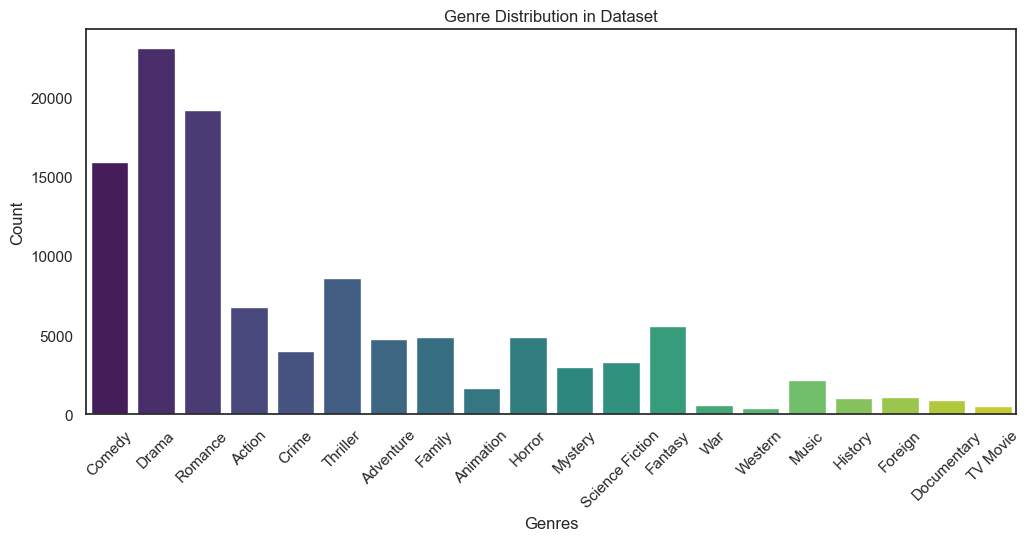

In [51]:
from collections import Counter
from ast import literal_eval

# Safely convert genre strings to lists
def safe_literal_eval(val):
    try:
        return literal_eval(val) if isinstance(val, str) else val
    except (SyntaxError, ValueError):
        return []  # Return an empty list if conversion fails

df['genres'] = df['genres'].apply(safe_literal_eval)

# Remove empty genre lists
df = df[df['genres'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

# Flatten the list of genres
all_genres = [genre for sublist in df['genres'] for genre in sublist]

# Count occurrences
genre_counts = Counter(all_genres)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Distribution in Dataset")
plt.show()


C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\1949438140.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\1949438140.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




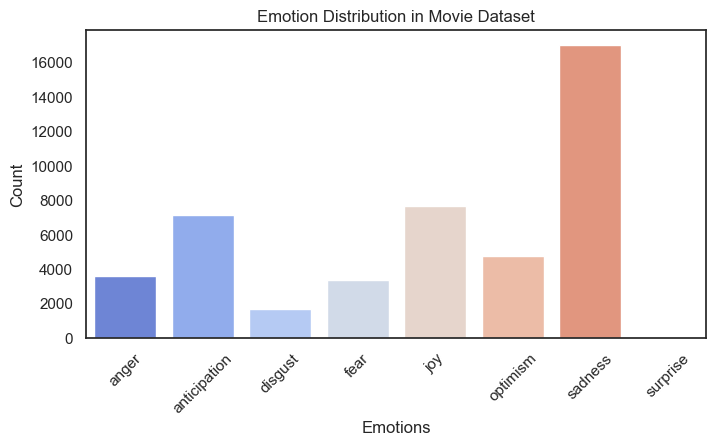

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize emotion labels by stripping spaces and ensuring consistency
df["emotion"] = df["emotion"].str.strip()

# Plot emotion distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df["emotion"], palette="coolwarm", order=sorted(df["emotion"].unique()))
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Emotion Distribution in Movie Dataset")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\121975937.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




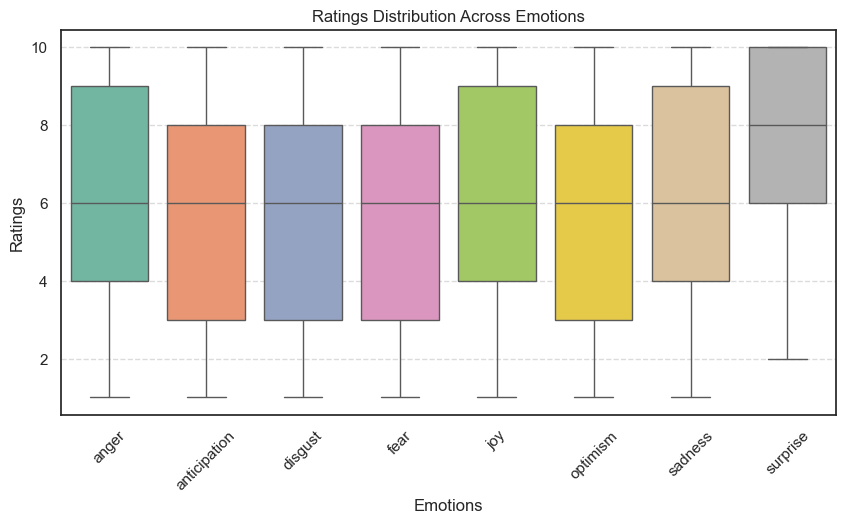

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Ratings column is numeric and remove invalid values
df = df[pd.to_numeric(df["Ratings"], errors="coerce").notnull()]
df["Ratings"] = df["Ratings"].astype(float)

# Standardize emotion labels
df["emotion"] = df["emotion"].str.strip()

# Plot Ratings Distribution Across Emotions
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["emotion"], y=df["Ratings"], palette="Set2", order=sorted(df["emotion"].unique()))
plt.xlabel("Emotions")
plt.ylabel("Ratings")
plt.title("Ratings Distribution Across Emotions")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid for better readability
plt.show()


In [54]:
# Ensure Ratings column is numeric
df["Ratings"] = pd.to_numeric(df["Ratings"], errors="coerce")

# Function to get all highest-rated movies per emotion
def top_movies_per_emotion(group):
    max_rating = group["Ratings"].max()  # Get the highest rating for the emotion
    return group[group["Ratings"] == max_rating][["movie_name", "Ratings"]]  # Filter movies with max rating

# Get top-rated movies for each emotion
top_movies = df.groupby("emotion").apply(top_movies_per_emotion).reset_index(drop=True)

# Display results
print(top_movies)


                   movie_name  Ratings
0                Broken Arrow     10.0
1                Broken Arrow     10.0
2                Broken Arrow     10.0
3                Broken Arrow     10.0
4                Broken Arrow     10.0
...                       ...      ...
6921  The Thomas Crown Affair     10.0
6922  The Thomas Crown Affair     10.0
6923  The Thomas Crown Affair     10.0
6924  The Thomas Crown Affair     10.0
6925  The Thomas Crown Affair     10.0

[6926 rows x 2 columns]


C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\209198084.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Unmapped Emotions: ['optimism']


C:\Users\chugh\AppData\Local\Temp\ipykernel_4004\2793584945.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




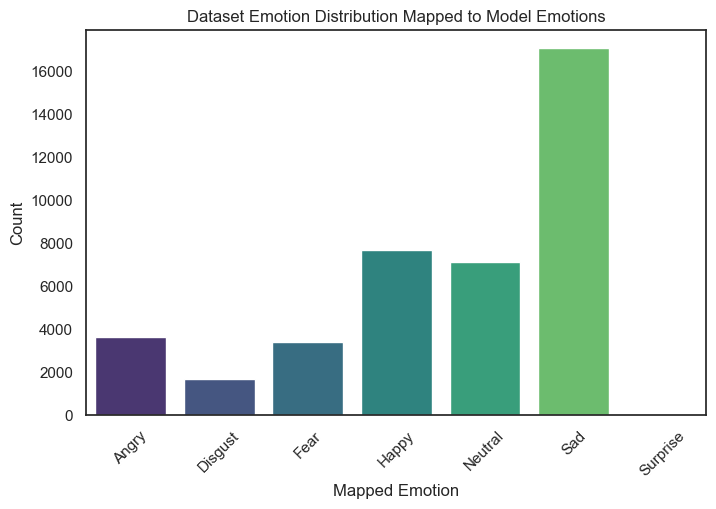

In [55]:
# Define updated emotion mapping based on the 7 detectable emotions
emotion_mapping = {
    "anger": "Angry",
    "disgust": "Disgust",
    "fear": "Fear",
    "joy": "Happy",
    "surprise": "Surprise",
    "sadness": "Sad",
    "neutral": "Neutral",
    "trust": "Neutral",  # Trust is mapped to Neutral (adjust as needed)
    "anticipation": "Neutral"  # Anticipation mapped to Neutral (adjust if needed)
}

# Map dataset emotions to model-detectable emotions
df["mapped_emotion"] = df["emotion"].map(emotion_mapping)

# Check if there are any unmapped emotions
unmapped_emotions = df["emotion"].loc[df["mapped_emotion"].isna()].unique()
print("Unmapped Emotions:", unmapped_emotions)

# Drop rows with unmapped emotions (if any)
df = df.dropna(subset=["mapped_emotion"])

# Visualizing the mapped emotions
plt.figure(figsize=(8, 5))
sns.countplot(x=df["mapped_emotion"], palette="viridis", order=sorted(df["mapped_emotion"].unique()))
plt.xlabel("Mapped Emotion")
plt.ylabel("Count")
plt.title("Dataset Emotion Distribution Mapped to Model Emotions")
plt.xticks(rotation=45)
plt.show()


In [56]:
import pandas as pd
from ast import literal_eval

# Load dataset
df = pd.read_csv("./Data/movie_dataset.csv")  # Replace with actual dataset path

# Clean the emotion column (remove extra spaces & check for missing values)
df["emotion"] = df["emotion"].astype(str).str.strip()
unique_emotions = sorted(df["emotion"].dropna().unique())

print("Unique Emotions:", unique_emotions)

# Safely convert genres column (handle errors if format is incorrect)
def safe_literal_eval(val):
    try:
        return literal_eval(val) if isinstance(val, str) else val
    except (SyntaxError, ValueError):
        return []  # Return empty list if conversion fails

df["genres"] = df["genres"].apply(safe_literal_eval)

# Extract unique genres
unique_genres = set(genre for genre_list in df["genres"] for genre in genre_list)

print("Unique Genres:", sorted(unique_genres))  # Sort for better readability


Unique Emotions: ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'optimism', 'sadness', 'surprise']
Unique Genres: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


# Youtube

In [ ]:
import pandas as pd
import webbrowser
import ipywidgets as widgets
from IPython.display import display, HTML
from ast import literal_eval

# Load movie dataset
def load_movie_dataset(file_path):
    df = pd.read_csv(file_path)

    # Convert 'genres' column from string to list (if needed)
    df["genres"] = df["genres"].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])
    
    return df

# Emotion-to-Genre Mapping
emotion_mapping = {
    "Angry": ["anger"],
    "Disgust": ["disgust"],
    "Fear": ["fear"],
    "Happy": ["joy", "optimism"],
    "Neutral": ["anticipation", "trust", "neutral"],
    "Sad": ["sadness"],
    "Surprise": ["surprise"]
}

genre_mapping = {
    "Angry": ["Comedy", "Animation", "Family", "Adventure", "Music", "Romance"],
    "Disgust": ["Psychological", "Thriller", "Crime", "Dark Comedy"],
    "Fear": ["Horror", "Mystery", "Thriller", "Supernatural"],
    "Happy": ["Comedy", "Animation", "Family", "Adventure", "Music", "Romance"],
    "Neutral": ["Fantasy", "Mystery", "Science Fiction", "Adventure"],
    "Sad": ["Comedy", "Drama", "Romance", "Documentary", "History", "War"],
    "Surprise": ["Mystery", "Fantasy", "Adventure", "Sci-Fi"]
}

# Function to get movie recommendations
def get_movie_recommendations(detected_emotion, df, top_n=5):
    emotions = emotion_mapping.get(detected_emotion, [])
    genres = genre_mapping.get(detected_emotion, [])

    # Filter movies by detected emotion
    filtered_df = df[df["emotion"].str.lower().isin(emotions)]

    # Further filter by genres
    filtered_df = filtered_df[filtered_df["genres"].apply(lambda g: any(genre in g for genre in genres))]

    # Remove duplicates and get top-rated movies
    filtered_df = filtered_df.drop_duplicates(subset="movie_name").nlargest(top_n, "Ratings")

    if filtered_df.empty:
        return []

    return filtered_df[["movie_name", "Ratings"]].to_dict(orient="records")

# Function to generate YouTube search URL
def open_youtube_trailer(movie_name):
    query = movie_name.replace(" ", "+") + "+movie+trailer"
    url = f"https://www.youtube.com/results?search_query={query}"
    webbrowser.open(url)
    display(HTML(f'<a href="{url}" target="_blank">Watch "{movie_name}" Trailer</a>'))

# Function to display recommendations in a dropdown
def recommend_movies_ui(detected_emotion, df, top_n=5):
    recommended_movies = get_movie_recommendations(detected_emotion, df, top_n)
    
    if not recommended_movies:
        print("No suitable movies found for this emotion.")
        return
    
    # Create dropdown with recommended movies
    movie_options = {f"{movie['movie_name']} (⭐ {movie['Ratings']})": movie['movie_name'] for movie in recommended_movies}
    dropdown = widgets.Dropdown(options=movie_options, description="Select Movie:")

    # Function to handle dropdown selection
    def on_movie_selected(change):
        if change["new"]:
            open_youtube_trailer(change["new"])
    dropdown.observe(on_movie_selected, names="value")
    display(dropdown)

# Example usage
df = load_movie_dataset("./Data/movie_dataset.csv")
detected_emotion = final_mood  # Replace with actual detected emotion
recommend_movies_ui(detected_emotion, df)


Dropdown(description='Select Movie:', options={'Thumbelina (⭐ 10.0)': 'Thumbelina', 'Evim Sensin (⭐ 10.0)': 'E…

Sentiment Analysis

In [68]:
import pandas as pd

# Load dataset (update the file path accordingly)
df = pd.read_csv("./Data/movie_dataset.csv")

# Display the first few rows
print(df.head())


   Unnamed: 0  Ratings                                            Reviews  \
0           0      3.0  It had some laughs, but overall the motivation...   
1           1      4.0  WAITING TO EXHALE Waiting, and waiting, and wa...   
2           2      4.0  Angela Basset was good as expected, but Whitne...   
3           3      5.0  The movie is okay, mediocre might even be the ...   
4           4      5.0  I got an opportunity to see Waiting To Exhale ...   

          movie_name                                           Resenhas  \
0  Waiting to Exhale  Riu algumas risadas, mas no geral a motivação ...   
1  Waiting to Exhale  ESPERANDO PARA EXALAR Esperando, e esperando, ...   
2  Waiting to Exhale  Angela Basset foi boa como o esperado, mas Whi...   
3  Waiting to Exhale  O filme é bom, medíocre pode até ser a palavra...   
4  Waiting to Exhale  Tive a oportunidade de ver Waiting To Exhale p...   

                           genres  \
0  ['Comedy', 'Drama', 'Romance']   
1  ['Comedy'

In [69]:
# Fill missing English reviews with Portuguese ones if available
df["Reviews"] = df["Reviews"].fillna(df["Resenhas"])

# Drop rows where "Reviews" is still missing after filling
df = df.dropna(subset=["Reviews"]).reset_index(drop=True)

# Display a few samples to confirm
df["Reviews"].sample(5)


29083    As I was a kid growing up in Italy, I remember...
22931    Scott Pilgrim versus the World is a Canadian r...
45721    It is natural that humans fight and flight is ...
28609    This one made my day, week and is one of the b...
9832     Having read the book before I saw this I thoug...
Name: Reviews, dtype: object

In [70]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize words
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize words
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(cleaned_tokens)

# Apply preprocessing to the "Reviews" column
df["cleaned_reviews"] = df["Reviews"].apply(preprocess_text)

# Display a sample of cleaned reviews
df[["Reviews", "cleaned_reviews"]].sample(5)


,Reviews,cleaned_reviews
38820,Freaked me out. Was fun. One of my fave found ...,freaked fun one fave found footage movie
5718,This movie is definitely on my list of the top...,movie definitely list top ten time obviously e...
46030,"I never wrote a review before, but felt like I...",never wrote review felt like needed add someth...
42941,Saw this screening at the HorrorHoundWeekend f...,saw screening horrorhoundweekend film festival...
5132,This movie is certainly resistable. Trite and...,movie certainly resistable trite often boring ...


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Define emotion labels
emotion_labels = ['Angry', 'Happy', 'Sad', 'Calm']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract TP, FP, TN, FN for each class
for i, label in enumerate(emotion_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"\nClass: {label}")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")


# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_labels))


104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step
Confusion Matrix:
[[ 358    0   81  702  177  182  182]
 [ 622    0  180 1246  331  348  318]
 [  26    0   13   79   20   22   19]
 [ 359    0   86  708  174  182  184]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]

Class: Angry
TP: 358, FP: 1007, FN: 1324, TN: 3910

Class: Happy
TP: 0, FP: 0, FN: 3045, TN: 3554

Class: Sad
TP: 13, FP: 347, FN: 166, TN: 6073

Class: Calm
TP: 708, FP: 2027, FN: 985, TN: 2879

Classification Report:


ValueError: Number of classes, 7, does not match size of target_names, 4. Try specifying the labels parameter

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(review):
    score = sia.polarity_scores(review)["compound"]  # Compound score
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to cleaned reviews
df["sentiment"] = df["cleaned_reviews"].apply(get_sentiment)

# Display a sample
df[["Reviews", "cleaned_reviews", "sentiment"]].sample(5)


KeyError: 'cleaned_reviews'

In [52]:
import matplotlib.pyplot as plt

# Count sentiment occurrences
sentiment_counts = df["sentiment"].value_counts()

# Print sentiment distribution
print(sentiment_counts)


sentiment
Positive    36838
Negative     8993
Neutral       342
Name: count, dtype: int64


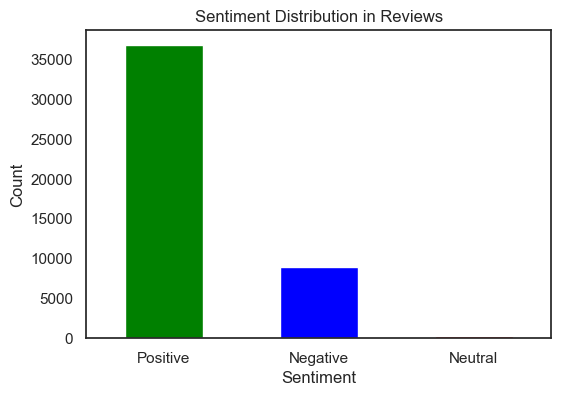

In [53]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "blue", "red"])
plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [67]:
# Group by movie name and get sentiment counts
movie_sentiments = df.groupby("movie_name")["sentiment"].value_counts().unstack()

# Show top movies with sentiment analysis
print(movie_sentiments.head(10))


KeyError: 'Column not found: sentiment'

In [55]:
# Define a function to map sentiment to emotions
import random

def map_sentiment_to_emotion(sentiment):
    if sentiment == "Positive":
        return random.choice(["Happy", "Surprise"])  
    elif sentiment == "Negative":
        return random.choice(["Sad", "Angry", "Fear", "Disgust"])  
    else:
        return "Neutral"

# Apply mapping to the dataframe
df["emotion"] = df["sentiment"].apply(map_sentiment_to_emotion)

# Display sample output
df[["sentiment", "emotion"]].sample(5)


,sentiment,emotion
19447,Positive,Happy
35423,Positive,Happy
8247,Positive,Surprise
32741,Negative,Sad
6721,Positive,Surprise


C:\Users\chugh\AppData\Local\Temp\ipykernel_15644\1236330566.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




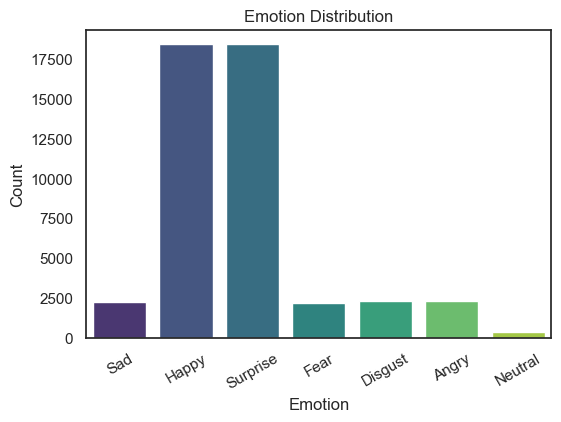

In [56]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["emotion"], palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


In [60]:
# Count the occurrences of each emotion per movie
emotion_counts = df.groupby("movie_name")["emotion"].value_counts().unstack().fillna(0)

# Determine the dominant emotion for each movie
df_movies = emotion_counts.idxmax(axis=1).reset_index()
df_movies.columns = ["movie_name", "dominant_emotion"]

# Merge back to main dataset
df = df.merge(df_movies, on="movie_name", how="left")

# Display first few rows
df[["movie_name", "dominant_emotion"]].drop_duplicates().head(10)


,movie_name,dominant_emotion
0,Waiting to Exhale,anticipation
8,Father of the Bride Part II,sadness
26,Heat,disgust
30,Sabrina,anticipation
58,Tom and Huck,fear
67,Sense and Sensibility,sadness
80,Leaving Las Vegas,sadness
91,It Takes Two,optimism
113,Clueless,anticipation
129,Restoration,sadness


# Sentiment Analyzed Recommendations

In [66]:
import random
import webbrowser
import ipywidgets as widgets
from IPython.display import display

# Function to recommend movies based on detected mood & sentiment
def recommend_movies(mood, sentiment, num_recommendations=5):
    filtered_movies = df[(df["emotion"] == mood) & (df["sentiment"] == sentiment)]["movie_name"].unique()
    return random.sample(list(filtered_movies), min(num_recommendations, len(filtered_movies)))

def get_youtube_link(movie_name):
    base_url = "https://www.youtube.com/results?search_query="
    search_query = "+".join(movie_name.strip().split()) + "+movie"  # Ensuring clean query and appending 'movie'
    return base_url + search_query

# Example: Emotion detected from Facial Emotion Detection System
final_mood = "Happy"  # Replace with actual detected emotion

# Map detected emotion to sentiment
mood_to_sentiment = {
    "Happy": "Positive",
    "Surprise": "Positive",
    "Angry": "Positive",
    "Sad": "Postitive",
    "Disgust": "Positive",
    "Fear": "Positive",
    "Neutral": random.choice(["Positive", "Negative"])
}

sentiment = mood_to_sentiment.get(final_mood, "Neutral")
recommended_movies = recommend_movies(final_mood, sentiment)

# If no movies found
if not recommended_movies:
    print(f"⚠ No movies found for {final_mood} ({sentiment} sentiment). Try another mood.")
else:
    print(f"🎬 Recommended Movies for '{final_mood}':")

    # Create dropdown with recommended movies
    movie_options = {movie: movie for movie in recommended_movies}
    dropdown = widgets.Dropdown(options=movie_options, description="Select Movie:")

    # Function to handle dropdown selection
    def on_movie_selected(change):
        if change["new"]:
            youtube_link = get_youtube_link(change["new"])
            print(f"\n🔗 Redirecting to YouTube: {youtube_link}+ movie")
            webbrowser.open(youtube_link)
    
    dropdown.observe(on_movie_selected, names="value")
    display(dropdown)


KeyError: 'sentiment'